In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import random

In [2]:
data_df = pd.read_csv("data.csv")
data_df = data_df.drop_duplicates()
data_df.head()

,question,A,B,C,D,Answer
0,I can't remember _____________ made the teach...,that it was what,what it was that,what was it that,that was it what,B
1,"He let out an ______________ cry, ""we've won!""",excited,exciting,excite,excites,A
2,Is football John's favourite sport? Yes. ____...,Near to,Except,Beside,Next to,D
3,Do you think regular exercise ___________ goo...,benefit from,reach for,make for,go for,C
4,Have you applied ___________ Mr Black _______...,for; to,with; for,with; about,to; for,D


In [3]:
data_df.describe()

,question,A,B,C,D,Answer
count,1158,1158,1158,1158,1158,1158
unique,1147,1123,1128,1130,1035,4
top,The boy the teachers considered _____ was caug...,that,which,that,which,C
freq,2,3,4,4,12,328


In [4]:
data_df['Answer'].value_counts()

C    328
B    306
D    277
A    247
Name: Answer, dtype: int64

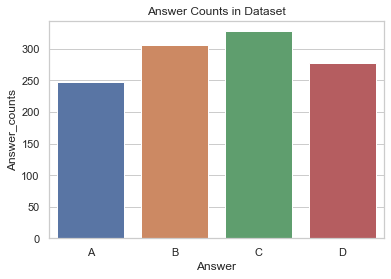

In [5]:
choice_counts_df = data_df['Answer'].value_counts()
choice_counts_df = choice_counts_df.reset_index()
choice_counts_df.columns = ['Answer','Answer_counts']
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Answer', y='Answer_counts', data=choice_counts_df,order = ['A','B','C','D']).set_title("Answer Counts in Dataset")

Judging by our data, we can see that the answers are not 100% evenly distributed. The number of questions with C as the answer is 334, which is 82 more than the number of questions with A as the answer.

In [6]:
data_df_random_guess =  data_df.copy()

In [7]:
class RandomGuess:
    def __init__(self, size, random_seed = 42):
        self.exam_size = size
        self.seed = random_seed
    
    def output(self):
        random.seed(self.seed)
        answers_list_num = np.random.randint(0,4,self.exam_size)
        answer_type = ['A','B','C','D']
        return [answer_type[answers_list_num[i]] for i in range(self.exam_size)]

In [8]:
total_score_list = [] 
for i in range(1000):
    data_df_random_guess = data_df.copy()
    data_df_random_guess['answer_predicted'] = RandomGuess(size = len(data_df)).output()
    data_df_random_guess['score'] = [1 if row[1]['answer_predicted']==row[1]['Answer'] else 0 for row in data_df_random_guess.iterrows()]
    total_score_list.append(data_df_random_guess['score'].sum()/len(data_df_random_guess))
np.array(total_score_list).sum()/len(total_score_list)

0.24977720207253887